# Resume recommendation engine using NLP techniques

Purpose of the following code is to help us understand if we can come up with a shortlist of candidates from a pool of resumes based on the requirements given by the client

Some observations
*Plot works best with one word skillsets such as Python,Java,SQL,Hadoop

*Works best with mainstream skillset combinations in related fields of technology mainly because of the
nature of the dataset.
 ex - Java skillsets - Java,J2EE,Spring,SQL,Hadoop
      Python+Java skillsets
* Works very well with skillset searches across categries as well.

In [6]:
# %load RecommendationHelper.py
#importing all required libraries
from io import StringIO
import pandas as pd
from collections import Counter
import copy
import re
import nltk
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()
from spacy.matcher import PhraseMatcher
import os
import numpy as np
import matplotlib.pyplot as plt
#RecommondationHelper file has all the functions that are called in this notebook.
#File has more docmentation regarding the functions
from RecommendationHelper_Final import *

In [7]:
#import the dataset in df_in dataframe
df_in = import_dataset()

In [8]:
#messy dataset
df_in

,Category,Resume,First_Name,Last_Name
0,Data Science,Skills * Programming Languages: Python (pandas...,Jamiya,McCullough
1,Data Science,Education Details\r\nMay 2013 to May 2017 B.E ...,Jermey,Roob
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Contina,Barrows
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Leona,Langosh
4,Data Science,"Education Details\r\n MCA YMCAUST, Faridaba...",Azul,Schmeler
...,...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,Hadley,Wilkinson
958,Testing,â Willingness to accept the challenges. â ...,Britta,Bogisich
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",Vivien,Koepp
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,Toriano,Luettgen


In [9]:
#calling the clean_resume function and fixing the iteration issues we had using fix_subset function
df_in['cleaned_resume'] = df_in.Resume.apply(lambda x: clean_resume(x))
df_in = df_in.drop('Resume', 1)
df_data = fix_subset(df_in)

In [10]:
#dataset after preprocessing and cleaning
df_data

,Category,Name,Resume
0,Data Science,Jamiya McCullough,Skills Programming Languages Python pandas num...
1,Data Science,Jermey Roob,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,Contina Barrows,Areas of Interest DL Control System Design Pro...
3,Data Science,Leona Langosh,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,Azul Schmeler,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...
957,Testing,Hadley Wilkinson,Computer Skills Proficient in MS office Word B...
958,Testing,Britta Bogisich,Willingness to a ept the challenges Positive ...
959,Testing,Vivien Koepp,PERSONAL SKILLS Quick learner Eagerness to lea...
960,Testing,Toriano Luettgen,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [11]:
df_data.to_csv('resumes.csv') #saving the dataframe into a csv. Useful for cross-verification purposes

In [14]:
#Enter in the order of preference separated by commas
key_main = input('Enter the main skillset you are looking for: ')

Enter the main skillset you are looking for: SQL,Python,Tableau


In [15]:
#Enter any good to have skills separated by commas
key_opt = input('Enter what other skillsets would be good to have: ')

Enter what other skillsets would be good to have: ML,Analytics


In [16]:
#convert the input skills to a list so that we can iterate over them
reqs = key_main+','+key_opt
keywords = reqs.split(',')
print(keywords)

['SQL', 'Python', 'Tableau', 'ML', 'Analytics']


In [17]:
#helper_function is helpful in calling the other utility functions
#in a preset order so that we can see how each resume fares in terms of the 
#skillset keyword frequency
skill_count_list = helper_function(df_data,keywords)
df_skills = pd.DataFrame(skill_count_list)

In [18]:
df_skills.head(100)

,SQL,Python,Tableau,ML,Analytics,Name
0,0,6,2,0,3,Jamiya McCullough
1,0,1,0,2,0,Jermey Roob
2,0,5,0,1,1,Contina Barrows
3,12,6,4,0,9,Leona Langosh
4,0,1,0,0,0,Azul Schmeler
...,...,...,...,...,...,...
95,0,0,0,0,0,Tamiko Kunde
96,0,0,0,0,0,Luther Frami
97,0,0,0,0,0,Rafael Gleason
98,0,0,0,0,0,Lesley McKenzie


In [20]:
df_plot = df_skills.sort_values(keywords[0],ascending=False)
df_plot = df_plot.set_index('Name')
df_plot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 962 entries, Hjalmar Upton to Maurine Ward
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   SQL        962 non-null    int64
 1   Python     962 non-null    int64
 2   Tableau    962 non-null    int64
 3   ML         962 non-null    int64
 4   Analytics  962 non-null    int64
dtypes: int64(5)
memory usage: 45.1+ KB


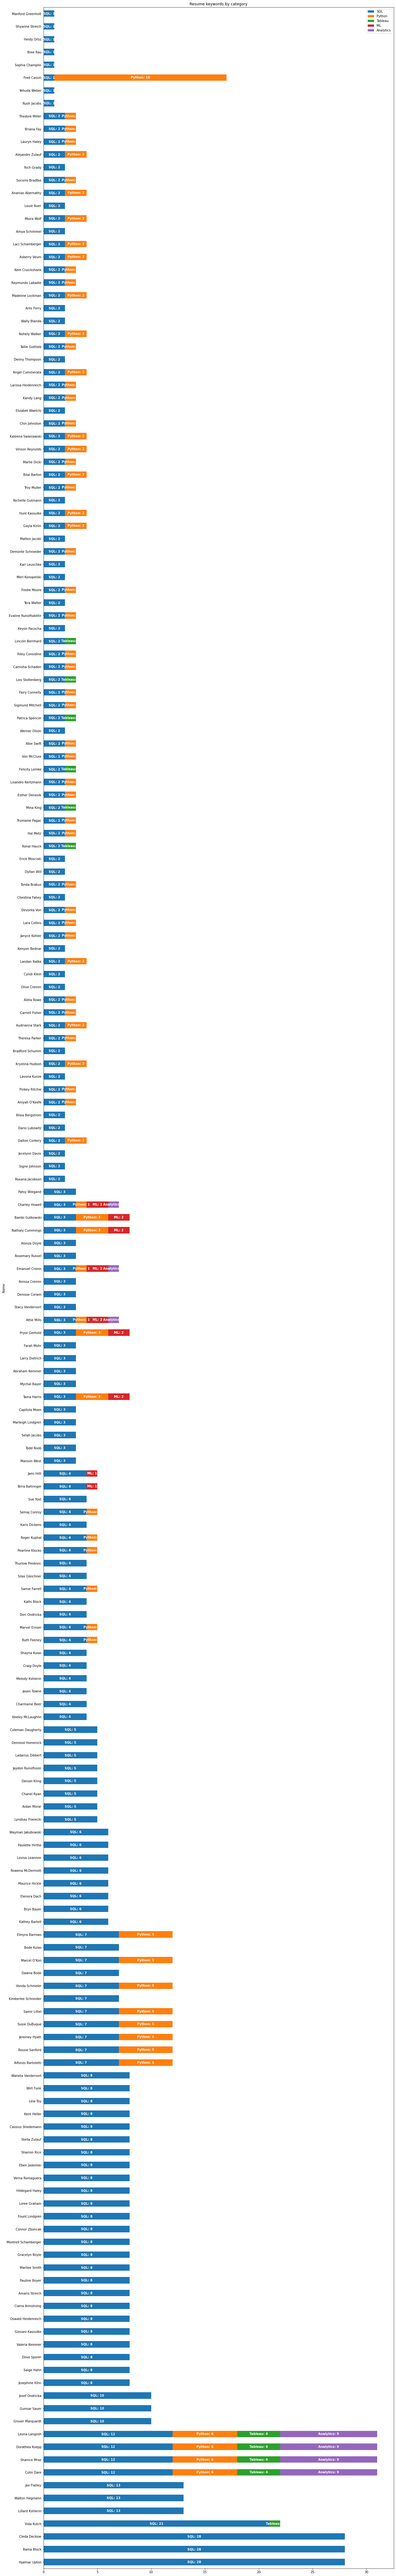

In [23]:
#Plotting the skillsets for each candidate
skillset_plot = plot_skillset_profile(df_plot)

In [22]:
#get top 10 candidate recommendations for each skill
recommendations_top10 = recommendations(df_skills[:200],keywords)
df_top10 = pd.DataFrame(recommendations_top10)
df_top10.head(100)

,Skill,Candidates
0,SQL,Leona Langosh
1,SQL,Dorathea Koepp
2,SQL,Colin Dare
3,SQL,Shanice Mraz
4,SQL,Cassius Stiedemann
5,SQL,Stella Zulauf
6,SQL,Hildegard Haley
7,SQL,Connor Zboncak
8,SQL,Montrell Schamberger
9,SQL,Oswald Heidenreich


In [26]:
#candidates having at least the top 3 skills required by the client
cond_1 = (df_skills[keywords[0]]>0) & (df_skills[keywords[1]]>0)&(df_skills[keywords[2]]>0)
top3skills = list(df_skills['Name'].loc[cond_1])
print(top3skills)

['Leona Langosh', 'Dorathea Koepp', 'Colin Dare', 'Shanice Mraz']


In [27]:
#get a gist of the experience for the candidates with the top 3 skills
for i in top3skills:
    print(i,'\n')
    #print(experience_chunks(df_data,i))
    #print(experience_idx(df_data,i))
    print(experience_rake(df_data,i,keywords),'\n')

Leona Langosh 

deployments introduced sap predictive analytics
provide advance analytics capabilities role
sql industry cross industry
tableau infer meaningful insights
1 year months python experience
sap analytics tool
process analytics ipa
hana python interface
complex sql scripts
sql profiler involved
advance analytics
process analytics
analytics infrastructure
pl sql
None 

Dorathea Koepp 

deployments introduced sap predictive analytics
provide advance analytics capabilities role
sql industry cross industry
tableau infer meaningful insights
1 year months python experience
sap analytics tool
process analytics ipa
hana python interface
complex sql scripts
sql profiler involved
advance analytics
process analytics
analytics infrastructure
pl sql
None 

Colin Dare 

deployments introduced sap predictive analytics
provide advance analytics capabilities role
sql industry cross industry
tableau infer meaningful insights
1 year months python experience
sap analytics tool
process analytics

In [89]:
######COMING UP WITH DIFFERENT COMBINATIONS OF SKILL SETS AND RECOMMENDATIONS ###########

In [32]:
#SQL,Python,Tableau + ML

In [33]:
#top 3 skills and any one of optional skill 
cond_2 = (df_skills[keywords[0]]>0) & (df_skills[keywords[1]]>0)&(df_skills[keywords[2]]>0)&(df_skills[keywords[3]]>0)
top3skills_skill3 = list(df_skills['Name'].loc[cond_2])
print(top3skills_skill3)

[]


In [34]:
#SQL,Python,Tableau + Analytics

In [35]:
#top 3 skills and any one of optional skill 
cond_3 = (df_skills[keywords[0]]>0) & (df_skills[keywords[1]]>0)&(df_skills[keywords[2]]>0)&(df_skills[keywords[4]]>0)
top3skills_skill4 = list(df_skills['Name'].loc[cond_3])
print(top3skills_skill4)

['Leona Langosh', 'Dorathea Koepp', 'Colin Dare', 'Shanice Mraz']


In [36]:
#SQL,Python + ML

In [37]:
#top 2 skills and any one of the optional skills
cond_4 = ((df_skills[keywords[0]]>0) & (df_skills[keywords[1]]>0))&(df_skills[keywords[3]]>0) 
top2skills_skill3 = list(df_skills['Name'].loc[cond_4])
print(top2skills_skill3)

['Sheldon Zieme', 'Bambi Gutkowski', 'Jimmie Thiel', 'Nathaly Cummings', 'Estie Grant', 'Pryor Gerhold', 'Tenisha Becker', 'Taina Harris', 'Emanuel Cronin', 'Attie Mills', 'Charley Howell']


In [38]:
#SQL,Python + Analytics

In [39]:
#top 2 skills and  one of the optional skills
cond_5 = ((df_skills[keywords[0]]>0) & (df_skills[keywords[1]]>0))&(df_skills[keywords[4]]>0) 
top2skills_skill4 = list(df_skills['Name'].loc[cond_5])
print(top2skills_skill4)

['Leona Langosh', 'Dorathea Koepp', 'Colin Dare', 'Shanice Mraz', 'Emanuel Cronin', 'Attie Mills', 'Charley Howell']


In [41]:
#Python,Tableau + ML

In [42]:
cond_6 = ((df_skills[keywords[1]]>0) & (df_skills[keywords[2]]>0))&(df_skills[keywords[3]]>0) 
top2_3skills_skill3 = list(df_skills['Name'].loc[cond_6])
print(top2_3skills_skill3)

["Rachelle O'Kon", 'Brandie Zemlak', 'Mardell Renner', 'Rosalee Quitzon', 'Margurite Prohaska', 'Chanie Murray', 'Eliezer Lesch', 'Dell Lakin', 'Reyes Monahan', 'Lemon Wilderman']


In [43]:
#Python,Tableau + Analytics

In [44]:
cond_6 = ((df_skills[keywords[1]]>0) & (df_skills[keywords[2]]>0))&(df_skills[keywords[4]]>0) 
top2_3skills_skill4 = list(df_skills['Name'].loc[cond_6])
print(top2_3skills_skill4)

['Jamiya McCullough', 'Leona Langosh', 'Melvin Schmitt', 'Dorathea Koepp', 'Atlas Erdman', 'Colin Dare', 'Crete Kovacek', 'Shanice Mraz']


In [45]:
#SQL,Tableau + ML

In [46]:
cond_7 = ((df_skills[keywords[0]]>0) & (df_skills[keywords[2]]>0))&(df_skills[keywords[3]]>0) 
top1_3skills_skill3 = list(df_skills['Name'].loc[cond_7])
print(top1_3skills_skill3)

[]


In [47]:
#SQL,Tableau + Analytics

In [48]:
cond_8 = ((df_skills[keywords[0]]>0) & (df_skills[keywords[2]]>0))&(df_skills[keywords[4]]>0) 
top1_3skills_skill4 = list(df_skills['Name'].loc[cond_8])
print(top1_3skills_skill4)

['Leona Langosh', 'Dorathea Koepp', 'Colin Dare', 'Shanice Mraz']


In [49]:
### Final recommendations###

In [58]:
print('SQL Python Tableau - candidate recommendations for the top 3 skills the client wanted','\n')
for i in top3skills:
    print(i,'\n')

SQL Python Tableau - candidate recommendations for the top 3 skills the client wanted 

Leona Langosh 

Dorathea Koepp 

Colin Dare 

Shanice Mraz 



In [50]:
print('SQL,Python,Tableau + ML - candidate recommendations','\n')
for i in top3skills_skill3:
    print(i,'\n')

SQL,Python,Tableau + ML - candidate recommendations 



In [51]:
print('SQL,Python,Tableau + Analytics - candidate recommendations','\n')
for i in top3skills_skill4:
    print(i,'\n')

SQL,Python,Tableau + Analytics - candidate recommendations 

Leona Langosh 

Dorathea Koepp 

Colin Dare 

Shanice Mraz 



In [52]:
print('SQL,Python + ML - candidate recommendations','\n')
for i in top2skills_skill3:
    print(i,'\n')

SQL,Python + ML - candidate recommendations 

Sheldon Zieme 

Bambi Gutkowski 

Jimmie Thiel 

Nathaly Cummings 

Estie Grant 

Pryor Gerhold 

Tenisha Becker 

Taina Harris 

Emanuel Cronin 

Attie Mills 

Charley Howell 



In [53]:
print('SQL,Python + Analytics - candidate recommendations','\n')
for i in top2skills_skill4:
    print(i,'\n')

SQL,Python + Analytics - candidate recommendations 

Leona Langosh 

Dorathea Koepp 

Colin Dare 

Shanice Mraz 

Emanuel Cronin 

Attie Mills 

Charley Howell 



In [54]:
print('Python,Tableau + ML - candidate recommendations','\n')
for i in top2_3skills_skill3:
    print(i,'\n')

Python,Tableau + ML - candidate recommendations 

Rachelle O'Kon 

Brandie Zemlak 

Mardell Renner 

Rosalee Quitzon 

Margurite Prohaska 

Chanie Murray 

Eliezer Lesch 

Dell Lakin 

Reyes Monahan 

Lemon Wilderman 



In [56]:
print('Python,Tableau + Analytics  - candidate recommendations','\n')
for i in top2_3skills_skill4:
    print(i,'\n')

Python,Tableau + Analytics  - candidate recommendations 

Jamiya McCullough 

Leona Langosh 

Melvin Schmitt 

Dorathea Koepp 

Atlas Erdman 

Colin Dare 

Crete Kovacek 

Shanice Mraz 



In [63]:
print('SQL,Tableau + ML  - candidate recommendations','\n')
for i in top1_3skills_skill3:
    print(i,'\n')
print('No candidate found with the mentioned skills')

SQL,Tableau + ML  - candidate recommendations 

No candidate found with the mentioned skills


In [60]:
print('SQL,Tableau + Analytics  - candidate recommendations','\n')
for i in top1_3skills_skill4:
    print(i,'\n')

SQL,Tableau + Analytics  - candidate recommendations 

Leona Langosh 

Dorathea Koepp 

Colin Dare 

Shanice Mraz 

